# IDAO2019

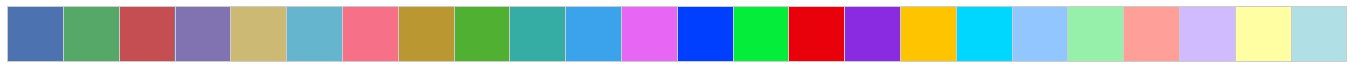

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

In [22]:
data = pd.read_csv('data/train_part_1_v2.csv.gz', nrows=10000, na_values='-9999.0')

In [3]:
data.iloc[73:78, :14]

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,MatchedHit_TYPE[0],MatchedHit_TYPE[1],MatchedHit_TYPE[2],MatchedHit_TYPE[3]
73,73,74,16,20,8,2.229730,5.500000,2.250000,1.125000,8,2,2,2,2
74,74,91,51,10,14,2.263736,2.901961,1.600000,1.642857,8,2,2,2,2
75,75,45,19,14,12,1.888889,1.789474,1.285714,1.583333,8,2,2,2,2
76,76,22,6,4,6,2.136364,1.833333,1.250000,1.000000,8,2,2,2,2
77,77,52,17,26,17,1.980769,2.117647,1.615385,1.588235,8,2,2,1,1


In [4]:
data.iloc[:, :14].describe()

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,MatchedHit_TYPE[0],MatchedHit_TYPE[1],MatchedHit_TYPE[2],MatchedHit_TYPE[3]
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,60.915000,19.130000,12.429000,12.870000,2.420321,2.081717,1.438516,1.365399,7.91800,1.963000,1.963000,1.808000,1.809000
std,288.819436,31.513567,12.366003,7.584358,6.375873,0.623815,0.736885,0.358197,0.420288,0.44438,0.188856,0.188856,0.450932,0.434405
min,0.000000,4.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,4.00000,1.000000,1.000000,0.000000,0.000000
25%,249.750000,38.000000,10.000000,7.000000,8.000000,1.974671,1.562500,1.175456,1.125000,8.00000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,55.000000,16.000000,11.000000,12.000000,2.346753,1.968246,1.375000,1.285714,8.00000,2.000000,2.000000,2.000000,2.000000
75%,749.250000,79.000000,25.000000,16.000000,16.000000,2.792208,2.459135,1.634701,1.500000,8.00000,2.000000,2.000000,2.000000,2.000000
max,999.000000,216.000000,82.000000,48.000000,47.000000,5.500000,7.117647,3.058824,6.000000,8.00000,2.000000,2.000000,2.000000,2.000000


In [5]:
data.iloc[73:78, 14:26]

,MatchedHit_X[0],MatchedHit_X[1],MatchedHit_X[2],MatchedHit_X[3],MatchedHit_Y[0],MatchedHit_Y[1],MatchedHit_Y[2],MatchedHit_Y[3],MatchedHit_Z[0],MatchedHit_Z[1],MatchedHit_Z[2],MatchedHit_Z[3]
73,-698.080,-753.40000,-836.17,-893.57,-2422.23360,-2611.91750,-2800.38040,-2987.30830,15394.378,16597.895,17790.018,18997.443
74,3516.250,3848.11000,4100.40,4381.02,-3648.43870,-3936.38300,-4224.35840,-4512.64840,15190.861,16397.125,17589.688,18797.549
75,-628.455,-705.57500,-747.87,-862.07,667.34640,718.26090,770.39650,824.06700,15405.504,16609.887,17802.875,19011.168
76,889.575,972.68500,1036.60,1108.22,-286.56180,-309.00793,-331.58475,-354.37665,15319.969,16527.188,17720.707,18929.523
77,564.225,615.45166,664.90,711.62,325.93805,351.64157,377.41446,402.87225,15121.173,16328.565,17522.258,18731.250


In [7]:
data.iloc[:, 14:26].describe()

,MatchedHit_X[0],MatchedHit_X[1],MatchedHit_X[2],MatchedHit_X[3],MatchedHit_Y[0],MatchedHit_Y[1],MatchedHit_Y[2],MatchedHit_Y[3],MatchedHit_Z[0],MatchedHit_Z[1],MatchedHit_Z[2],MatchedHit_Z[3]
count,1000.000000,1000.000000,976.000000,983.000000,1000.000000,1000.000000,976.000000,983.000000,1000.000000,1000.000000,976.000000,983.000000
mean,55.412487,56.338393,69.498948,59.188969,-16.106781,-20.465477,-24.817651,6.322234,15263.611657,16470.833837,17660.150275,18869.642286
std,1586.051272,1730.030748,1872.391109,1999.965901,1332.649069,1433.571399,1525.435748,1604.780144,110.000637,111.062824,111.196524,111.237034
min,-4709.180000,-5243.800000,-5534.870000,-5910.570000,-3951.223600,-4259.906700,-4567.468800,-4852.194000,15106.832000,16310.135000,17499.955000,18707.023000
25%,-782.923750,-858.468750,-912.120000,-1034.070000,-722.438300,-780.723100,-836.954960,-893.315550,15192.151750,16382.125250,17528.651000,18736.109500
50%,21.333334,25.072500,50.800000,55.120000,-32.562122,-17.756020,15.703892,18.368454,15308.599000,16516.154000,17615.902500,18911.236000
75%,841.368750,894.553750,977.600000,1041.720000,783.449400,840.488400,901.001950,966.544225,15394.378000,16601.666750,17790.408000,18998.434500
max,4781.950000,5209.310000,5557.000000,5933.120000,3694.210000,3981.661900,4269.083000,4557.709000,15418.304000,16626.639000,17821.273000,19031.213000


In [8]:
data.iloc[73:78, 26:34]

,MatchedHit_DX[0],MatchedHit_DX[1],MatchedHit_DX[2],MatchedHit_DX[3],MatchedHit_DY[0],MatchedHit_DY[1],MatchedHit_DY[2],MatchedHit_DY[3]
73,25.500000,27.500000,118.000000,126.000000,126.278550,136.278490,146.278410,156.278350
74,25.500000,27.500000,118.000000,126.000000,126.278550,136.278490,146.278410,156.278350
75,6.375000,6.875000,29.500000,31.500000,31.479162,33.979145,36.479130,38.979115
76,6.375000,6.875000,29.500000,31.500000,31.479162,33.979145,36.479130,38.979115
77,3.208333,3.458333,14.833333,15.833333,15.679264,16.929256,18.179249,19.429240


In [9]:
data.iloc[73:78, 34:46].head()

,MatchedHit_DZ[0],MatchedHit_DZ[1],MatchedHit_DZ[2],MatchedHit_DZ[3],MatchedHit_T[0],MatchedHit_T[1],MatchedHit_T[2],MatchedHit_T[3],MatchedHit_DT[0],MatchedHit_DT[1],MatchedHit_DT[2],MatchedHit_DT[3]
73,33.954950,33.990960,34.026966,34.062977,9,7,8,7,1,2,-1,0
74,33.954950,33.990960,34.026966,34.062977,9,9,6,9,2,1,0,1
75,33.613575,33.622578,33.631580,33.640583,8,3,11,5,3,1,1,0
76,33.613575,33.622578,33.631580,33.640583,5,7,8,11,-2,0,0,0
77,33.556680,33.561180,33.565680,33.570183,4,5,4,6,-1,0,4,6


In [10]:
data.iloc[73:78, 46:59]

,Lextra_X[0],Lextra_X[1],Lextra_X[2],Lextra_X[3],Lextra_Y[0],Lextra_Y[1],Lextra_Y[2],Lextra_Y[3],NShared,Mextra_DX2[0],Mextra_DX2[1],Mextra_DX2[2],Mextra_DX2[3]
73,-696.81420,-759.28217,-821.7502,-884.21814,-2301.81270,-2482.10990,-2662.40700,-2842.7039,0,11.863980,34.503020,75.87783,142.43996
74,3503.68400,3828.90000,4154.1157,4479.33150,-3519.58350,-3795.34420,-4071.10500,-4346.8657,0,455.914180,1323.217800,3027.11960,5984.50900
75,-617.29100,-686.53864,-755.7863,-825.03400,627.04956,676.38200,725.71440,775.0469,0,76.990845,227.052470,511.34735,983.95790
76,884.77560,964.19745,1043.6193,1123.04110,-286.33000,-308.82916,-331.32834,-353.8275,0,16.864113,46.967163,103.35230,197.25542
77,572.82904,626.36220,679.8953,733.42847,335.91830,362.41055,388.90283,415.3951,0,12.718568,36.792830,81.80656,155.93654


In [11]:
data.iloc[73:78, 59:70]

,Mextra_DY2[0],Mextra_DY2[1],Mextra_DY2[2],Mextra_DY2[3],FOI_hits_N,FOI_hits_X,FOI_hits_Y,FOI_hits_Z,FOI_hits_DX,FOI_hits_DY,FOI_hits_DZ
73,12.098840,35.186043,77.379906,145.25970,6,[-698.08 -686.78 -753.4 -742.1 -836.17 -893.57],[-2422.2336 -2128.329 -2611.9175 -2298.2131 -...,[15394.378 15110.435 16597.895 16314.023 17790...,[ 25.5 25.5 27.5 27.5 118. 126. ],[126.27855 126.27855 136.27849 136.27849 146.2...,[33.95495 33.95495 33.99096 33.99096 34.02...
74,447.200470,1297.929100,2969.269000,5870.14260,5,[3465.25 3516.25 3848.11 4100.4 4381.02],[-3648.4387 -3648.4387 -3936.383 -4224.3584 -...,[15190.861 15190.861 16397.125 17589.688 18797...,[ 25.5 25.5 27.5 118. 126. ],[126.27855 126.27855 136.27849 146.27841 156.2...,[33.95495 33.95495 33.99096 34.026966 34.06...
75,76.857216,226.658330,510.459630,982.24963,9,[-641.205 -628.455 -613.105 -774.325 -774.325 ...,[667.3464 667.3464 663.5489 718.2609 650.0...,[15405.504 15405.504 15321.49 16609.887 16609...,[ 6.375 6.375 6.375 6.875 6.875 6.875 6....,[31.479162 31.479162 31.479162 33.979145 33.97...,[33.613575 33.613575 33.613575 33.622578 33.62...
76,16.795523,46.776127,102.931920,196.45308,4,[ 889.575 972.685 1036.6 1108.22 ],[-286.5618 -309.00793 -331.58475 -354.37665],[15319.969 16527.188 17720.707 18929.523],[ 6.375 6.875 29.5 31.5 ],[31.479162 33.979145 36.47913 38.979115],[33.613575 33.622578 33.63158 33.640583]
77,12.699079,36.736450,81.681190,155.69757,5,[564.225 615.45166 622.36835 664.9 711.6...,[325.93805 351.64157 351.64157 377.41446 402.8...,[15121.173 16328.565 16328.565 17522.258 18731...,[ 3.2083333 3.4583333 3.4583333 14.833333 1...,[15.679264 16.929256 16.929256 18.179249 19.42...,[33.55668 33.56118 33.56118 33.56568 33.57...


In [12]:
data.iloc[73:78, 70:80]

,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P,sWeight,particle_type,label,kinWeight,weight
73,[9 9 7 7 8 7],[ 1 5 2 6 -1 0],[0 0 1 1 2 3],10512.173158,69187.785973,0.825232,1,1,1.85646,1.532010
74,[7 9 9 6 9],[0 2 1 0 1],[0 0 1 2 3],3111.825997,11794.414495,1.158660,1,1,1.85646,2.151005
75,[ 6 8 2 6 6 3 3 11 5],[ 1 3 0 4 -1 1 -4 1 0],[0 0 0 1 1 1 1 2 3],1051.585482,25171.345682,0.670558,1,1,1.85646,1.244863
76,[ 5 7 8 11],[-2 0 0 0],[0 1 2 3],2453.239833,52853.195626,-0.147970,1,1,1.85646,-0.274701
77,[ 4 5 11 4 6],[-1 0 0 4 6],[0 1 1 2 3],2007.715912,61296.789201,0.614264,1,1,1.85646,1.140357


In [13]:
import utils
import scoring
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
data_simple_cols = data.loc[:, utils.SIMPLE_FEATURE_COLUMNS]
data_target_cols = data.loc[:, utils.TRAIN_COLUMNS]

In [24]:
train_x, test_x, train_y, test_y = train_test_split(data_simple_cols, data_target_cols, test_size=0.2, shuffle=True)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8000, 65), (8000, 2), (2000, 65), (2000, 2))

In [25]:
from sklearn import metrics, ensemble
import xgboost as xgb

In [29]:
%%time
estimator = xgb.XGBClassifier(n_estimators=100)
estimator.fit(train_x.values, train_y.label.values, sample_weight=train_y.weight.values)
predictions = estimator.predict_proba(test_x.values)[:, 1]

score = scoring.rejection90(test_y.label.values, predictions, sample_weight=test_y.weight.values)
print(score)

0.31995253555751796
Wall time: 1.98 s


___

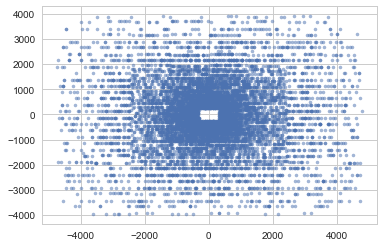

In [30]:
xs = data.loc[:, 'MatchedHit_X[0]']
ys = data.loc[:, 'MatchedHit_Y[0]']

plt.scatter(xs, ys, s=10, alpha=0.5)

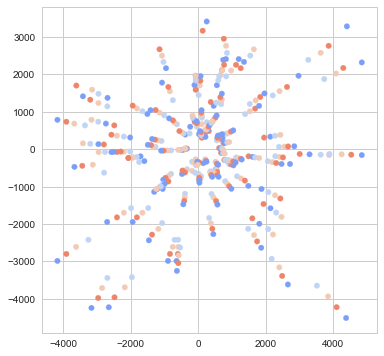

In [31]:
colors = sns.color_palette("coolwarm", utils.N_STATIONS).as_hex()

x_cols = ['MatchedHit_X[%i]' % i for i in range(utils.N_STATIONS)]
y_cols = ['MatchedHit_Y[%i]' % i for i in range(utils.N_STATIONS)]
z_cols = ['MatchedHit_Z[%i]' % i for i in range(utils.N_STATIONS)]

cnt = 100
xs = data.loc[:cnt, x_cols]
ys = data.loc[:cnt, y_cols]

plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, s=30, c=colors)

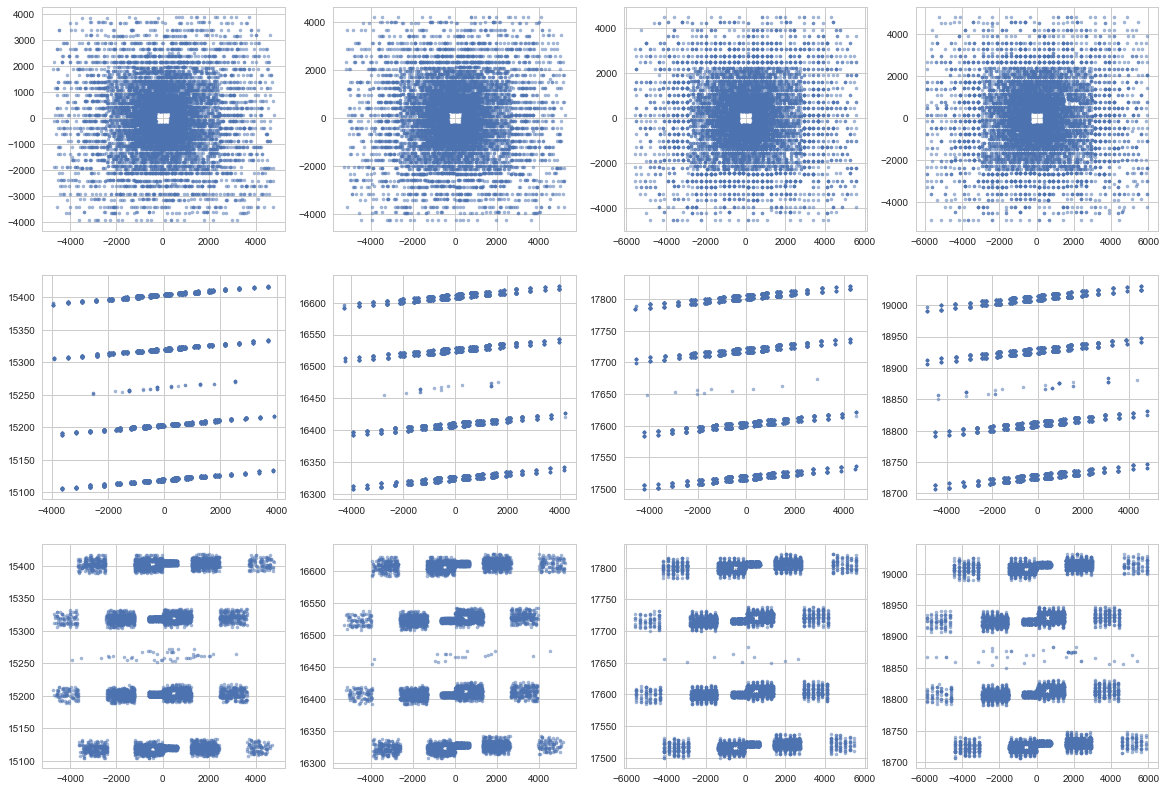

In [32]:
def plot_scatter(xs, ys, ax):
    ax.scatter(xs, ys, s=10, alpha=0.5)
    
def multiplot_coords(data):
    fig, axes = plt.subplots(3, 4)
    fig.set_size_inches(20., 14.)

    for i in range(4):
        ax = axes[i//4, i%4]
        plot_scatter(data.loc[:, x_cols[i]], data.loc[:, y_cols[i]], ax)
        ax = axes[i//4 + 1, i%4]
        plot_scatter(data.loc[:, y_cols[i]], data.loc[:, z_cols[i]], ax)
        ax = axes[i//4 + 2, i%4]
        plot_scatter(data.loc[:, x_cols[i]], data.loc[:, z_cols[i]], ax)
        
multiplot_coords(data)

In [33]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3)
pca_model.fit(data.loc[:, [x_cols[0], y_cols[0], z_cols[0]]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
a = pd.DataFrame([[1.0, np.NaN], [np.NaN, np.NaN]], columns=['a', 'b'])
b = a.copy()
b.fillna(0., inplace=True)
b.mask(a.isna(), other=np.NaN)

,a,b
0,1.0,NaN
1,NaN,NaN


In [35]:
coord_cols = x_cols + y_cols + z_cols
tr_data = data.loc[:, coord_cols].copy()

means = tr_data.mean(skipna=True)
tr_data.fillna(means, inplace=True)

for i in range(4):
    tr_data.loc[:, [x_cols[i], y_cols[i], z_cols[i]]] = pca_model.transform(tr_data.loc[:, [x_cols[i], y_cols[i], z_cols[i]]])

tr_data.mask(data.loc[:, coord_cols].isna(), other=np.NaN, inplace=True)

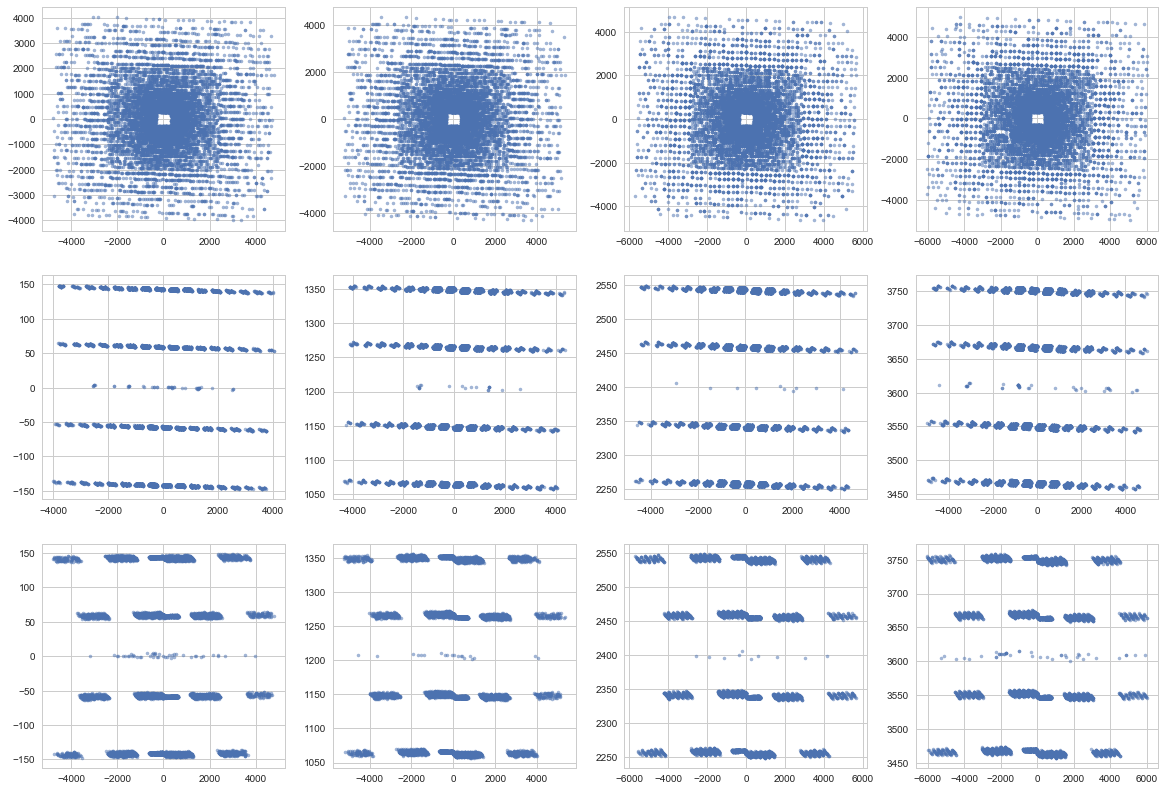

In [36]:
multiplot_coords(tr_data)

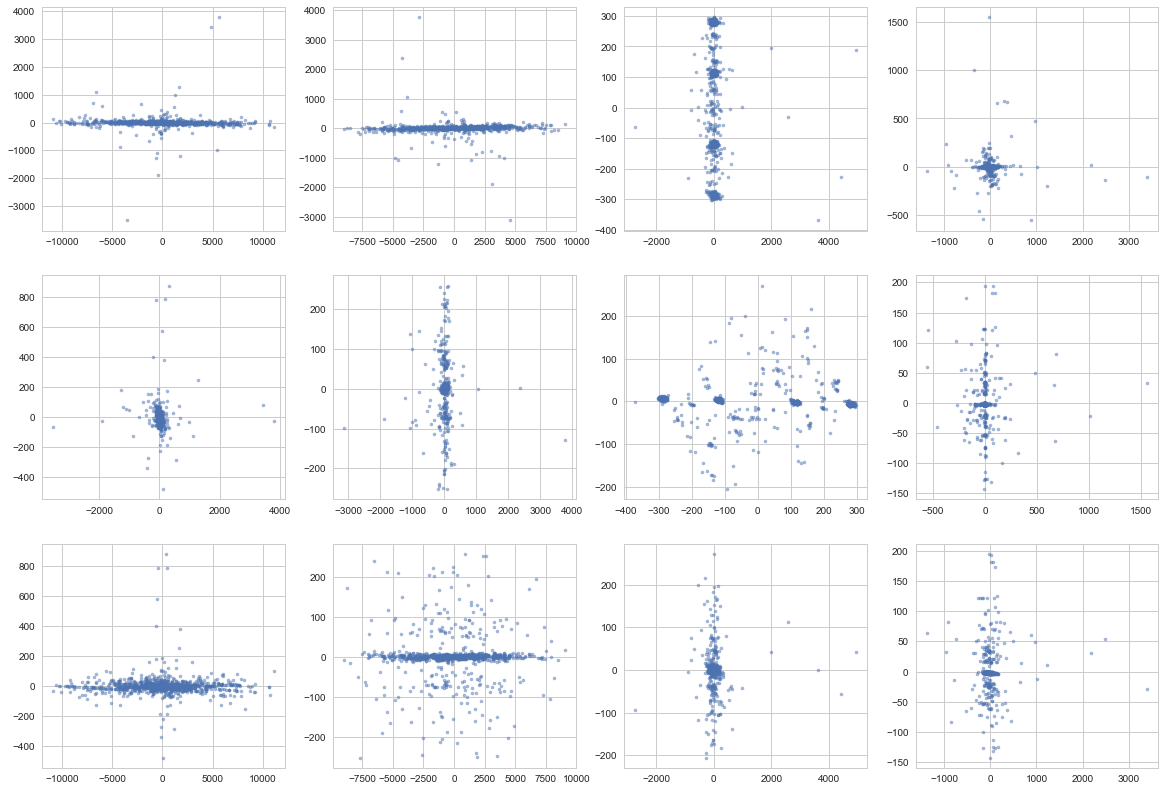

In [162]:
from sklearn.decomposition import PCA

coord_cols = x_cols + y_cols + z_cols
tr_data = data.loc[:, coord_cols].copy()

means = tr_data.mean(skipna=True)
tr_data.fillna(means, inplace=True)

pca_model = PCA(n_components=len(coord_cols))
# tr_data.loc[:, coord_cols] = pca_model.fit_transform(tr_data.loc[:, coord_cols])

tr_data.mask(data.loc[:, coord_cols].isna(), other=np.NaN, inplace=True)
multiplot_coords(tr_data)

In [42]:
%%time
train_x, test_x, train_y, test_y = train_test_split(tr_data, data_target_cols, test_size=0.2, shuffle=True)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

estimator = xgb.XGBClassifier(n_estimators=100)
estimator.fit(train_x.values, train_y.label.values, sample_weight=train_y.weight.values)
predictions = estimator.predict_proba(test_x.values)[:, 1]

score = scoring.rejection90(test_y.label.values, predictions, sample_weight=test_y.weight.values)
print(score)

0.31952853572472456
Wall time: 898 ms


In [43]:
def cn(layer, dim): 
    return 'MatchedHit_%s[%d]' % (dim, layer)

def add_coses(train):    
    def v(layer, dim):
        return train[cn(layer, dim)] - train[cn(layer + 1, dim)]
    
    for i in range(1, 3):
        train[cn(i, 'DA')] = (v(i - 1, 'X') * v(i, 'X') + v(i - 1, 'Y') * v(i, 'Y') + v(i - 1, 'Z') * v(i, 'Z')) / \
                           np.sqrt(v(i - 1, 'X') ** 2 + v(i - 1, 'Y') ** 2 + v(i - 1, 'Z') ** 2) / \
                           np.sqrt(v(i, 'X') ** 2 + v(i, 'Y') ** 2 + v(i, 'Z') ** 2)
        train[cn(i, 'DACOS')] = np.arccos(train[cn(i, 'DA')]) / np.pi * 180

In [49]:
%%time
add_coses(tr_data)
train_x, test_x, train_y, test_y = train_test_split(tr_data, data_target_cols, test_size=0.2, shuffle=True)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

estimator = xgb.XGBClassifier(n_estimators=100)
estimator.fit(train_x.values, train_y.label.values, sample_weight=train_y.weight.values)
predictions = estimator.predict_proba(test_x.values)[:, 1]

score = scoring.rejection90(test_y.label.values, predictions, sample_weight=test_y.weight.values)
print(score)

C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':


0.43576280358587416
Wall time: 1.22 s
